In [1]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model

In [2]:
!pip install wget
import wget

In [3]:
import wget
url = 'https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
myfile = wget.download(url)

100% [........................................................................] 87910968 / 87910968

In [4]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [5]:
local_weights_file = 'E:\\TensorflowDeveloperCertification\\Learning/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [6]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

In [7]:
pre_trained_model.load_weights(local_weights_file)

In [8]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [9]:
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [10]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [11]:
import wget
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
myfile = wget.download(url)

  1% [                                                                        ]   778240 / 68606236

  2% [..                                                                      ]  2056192 / 68606236

  4% [...                                                                     ]  3293184 / 68606236

  6% [....                                                                    ]  4530176 / 68606236

  8% [.....                                                                   ]  5603328 / 68606236

  9% [.......                                                                 ]  6692864 / 68606236

 11% [........                                                                ]  7864320 / 68606236

 13% [.........                                                               ]  9191424 / 68606236

 15% [...........                                                             ] 10567680 / 68606236

 16% [............                                                            ] 11476992 / 68606236

 19% [.............                                                           ] 13107200 / 68606236

 20% [...............                                                         ] 14344192 / 68606236

 22% [................                                                        ] 15564800 / 68606236

 24% [.................                                                       ] 16506880 / 68606236

 25% [..................                                                      ] 17596416 / 68606236

 27% [....................                                                    ] 19120128 / 68606236

 29% [.....................                                                   ] 20332544 / 68606236

 31% [......................                                                  ] 21495808 / 68606236

 32% [.......................                                                 ] 22560768 / 68606236

 34% [........................                                                ] 23805952 / 68606236

 36% [..........................                                              ] 24952832 / 68606236

 37% [...........................                                             ] 25804800 / 68606236

 38% [...........................                                             ] 26632192 / 68606236

 40% [............................                                            ] 27443200 / 68606236

 41% [.............................                                           ] 28213248 / 68606236

 42% [..............................                                          ] 29278208 / 68606236

100% [........................................................................] 68606236 / 68606236

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

In [15]:
local_zip = 'E:\\TensorflowDeveloperCertification\\Learning/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('E:\\TensorflowDeveloperCertification\\Learning')
zip_ref.close()

In [16]:
# Define our example directories and files
base_dir = 'E:\\TensorflowDeveloperCertification\\Learning/cats_and_dogs_filtered'
train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

In [17]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 246s - loss: 0.3179 - accuracy: 0.8730 - val_loss: 0.0949 - val_accuracy: 0.9610
Epoch 2/20
100/100 - 244s - loss: 0.2276 - accuracy: 0.9160 - val_loss: 0.0975 - val_accuracy: 0.9630
Epoch 3/20
100/100 - 228s - loss: 0.1798 - accuracy: 0.9350 - val_loss: 0.1348 - val_accuracy: 0.9560
Epoch 4/20
100/100 - 244s - loss: 0.2137 - accuracy: 0.9245 - val_loss: 0.2002 - val_accuracy: 0.9400
Epoch 5/20
100/100 - 236s - loss: 0.2073 - accuracy: 0.9290 - val_loss: 0.1021 - val_accuracy: 0.9660
Epoch 6/20
100/100 - 237s - loss: 0.1802 - accuracy: 0.9345 - val_loss: 0.1115 - val_accuracy: 0.9690
Epoch 7/20
100/100 - 235s - loss: 0.1701 - accuracy: 0.9415 - val_loss: 0.1242 - val_accuracy: 0.9620
Epoch 8/20
100/100 - 241s - loss: 0.1785 - accuracy: 0.9380 - val_loss: 0.1036 - val_accuracy: 0.9680
Epoch 9/20
100/100 - 230s - loss: 0.1511 - accuracy: 0.9490 - val_loss: 0.1257 - val_accuracy: 0.9620
Epoch 10/20
100/100 - 225s - loss: 0.1499 - accuracy: 0.9475 - val_loss: 0.1441 - 

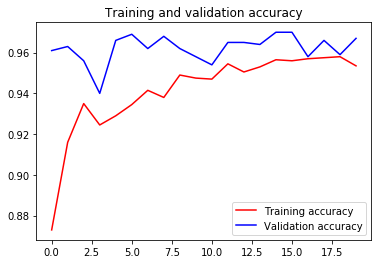

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()